In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
file='/home/ubuntu/Desktop/Coding/ML/creditcard.csv'
df=pd.read_csv(file)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,69.99,0


In [4]:
df.shape

(284807, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   Amount  284807 non-null  float64
 10  Class   284807 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 23.9 MB


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.181148e-15,3.416908e-16,-1.379537e-15,2.100440e-15,9.604066e-16,1.493301e-15,-5.552476e-16,1.149614e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,25691.160000,1.000000


In [7]:
df.isnull().sum() #checking if any value is missed in any of the columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
Amount    0
Class     0
dtype: int64

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is Highly Unbanlanced
Here,
0 represents Valid Transactions
1 represents Spam Transactions

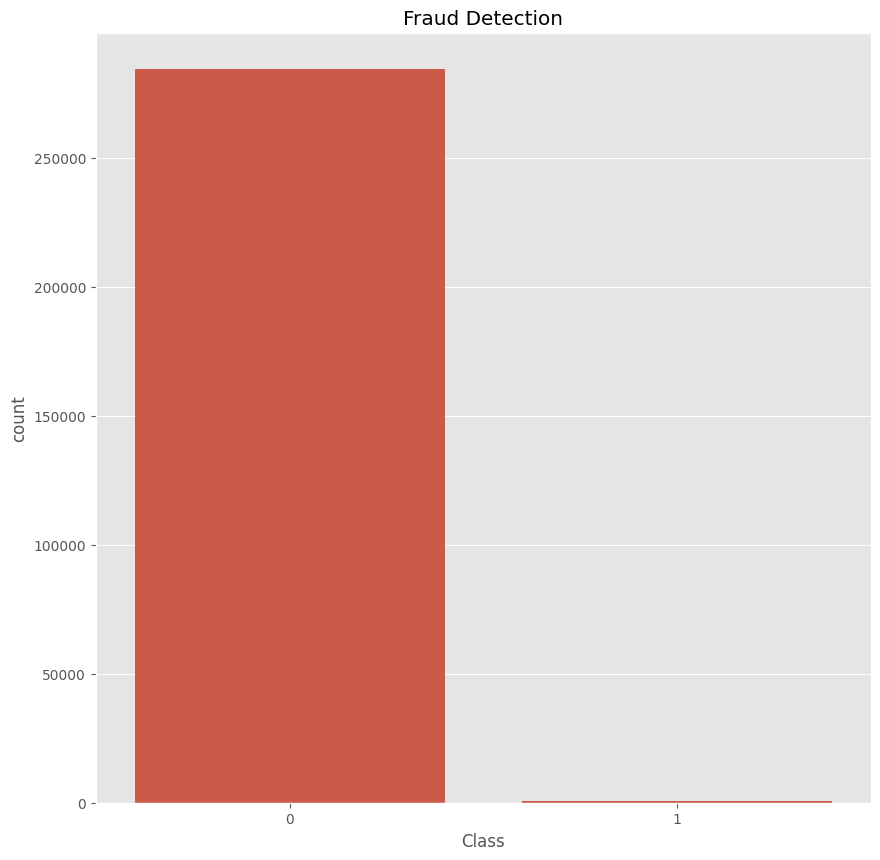

In [9]:
plt.figure(figsize=(10,10))
style.use('ggplot')
sns.countplot(x="Class",data=df)
plt.title("Fraud Detection")
plt.show()

Its clear from the above graph that the Spam Transactions are very very small (Almost Negligible) when compared to Correct/ Normal Transactions

In [10]:
normal=df[df.Class==0]
fraud=df[df.Class==1]

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

As the Dataset is too large especially for the normal transactions when compared with spam ones, we build a sample data set from the original set of data.

In [13]:
normal_sample=normal.sample(n=492)

Now we concatenate the normal_sample and the spam transactions

In [14]:
new_df=pd.concat([normal_sample,fraud],axis=0) # As we are concatenating 2 datasets in row-wise manner we use axis=0, if col-wise use axis=1

In [15]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
45175,42236,1.121082,-0.284154,0.472140,0.697430,-0.641870,-0.163567,-0.304183,0.175420,48.46,0
9279,13377,-1.887363,1.292940,-1.029589,-0.054906,-3.459512,1.249290,2.416203,0.752276,641.27,0
162927,115488,1.947297,-0.284316,-0.382948,0.176914,-0.327086,0.014309,-0.582375,0.127159,6.51,0
241173,150913,-0.352792,1.277101,-2.873877,-0.071128,0.018405,-1.366385,2.458778,-0.363301,318.00,0
144144,85894,1.363701,0.141339,-0.010517,-0.275296,-0.056776,-0.692339,0.110298,-0.263751,1.00,0


In [16]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
279863,169142,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,390.00,1
280143,169347,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,0.76,1
280149,169351,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,77.89,1
281144,169966,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,245.00,1
281674,170348,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,42.53,1


In [17]:
new_df.shape

(984, 11)

In [18]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [19]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
45175,42236,1.121082,-0.284154,0.472140,0.697430,-0.641870,-0.163567,-0.304183,0.175420,48.46,0
9279,13377,-1.887363,1.292940,-1.029589,-0.054906,-3.459512,1.249290,2.416203,0.752276,641.27,0
162927,115488,1.947297,-0.284316,-0.382948,0.176914,-0.327086,0.014309,-0.582375,0.127159,6.51,0
241173,150913,-0.352792,1.277101,-2.873877,-0.071128,0.018405,-1.366385,2.458778,-0.363301,318.00,0
144144,85894,1.363701,0.141339,-0.010517,-0.275296,-0.056776,-0.692339,0.110298,-0.263751,1.00,0


In [20]:
x=new_df.drop(['Class'],axis=1)
y=new_df['Class']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)
# stratify used to set the splited data equally on both (xtrain and xtest) and (ytrain and ytest)

In [22]:
print(x.shape,x_train.shape,x_test.shape)
x_train

(984, 10) (787, 10) (197, 10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount
100623,67571,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,549.06
108361,70861,1.228918,-0.083592,0.264748,0.647690,-0.067144,0.374197,-0.244041,0.097491,11.50
31522,36398,1.091801,-0.152956,1.453531,0.937469,-1.103658,-0.125230,-0.630968,0.130509,13.79
209407,137545,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,29.99
261513,160052,1.985151,-0.121681,-1.209204,0.291140,-0.085233,-1.056178,0.133168,-0.255270,19.95
...,...,...,...,...,...,...,...,...,...,...
139076,83003,1.185768,0.237258,0.722846,1.376549,-0.808346,-1.197490,-0.021091,-0.105828,4.90
216068,140336,2.115619,-0.374328,-2.377326,-0.499831,0.559736,-0.705460,0.297230,-0.138921,15.00
223618,143456,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,1.00
43061,41353,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,34.12


In [23]:
logisre=LogisticRegression()

In [24]:
logisre.fit(x_train,y_train)

LogisticRegression()

In [25]:
x_train_pred=logisre.predict(x_train)
training_accuracy=accuracy_score(x_train_pred,y_train)

In [26]:
print("Accuracy on Training Data is: ",training_accuracy)

Accuracy on Training Data is:  0.9199491740787802


In [27]:
x_test_pred=logisre.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)

In [28]:
print("Accuracy on Test Data is: ",test_accuracy)

Accuracy on Test Data is:  0.9238578680203046


In [101]:
data={'Time':406,'V1':-2.3122265423263,'V2':1.95199201064158,'V3':-1.60985073229769,'V4':3.9979055875468,'V5':-0.522187864667764,'V6':-1.42654531920595,'V7':-2.53738730624579,'V8':1.39165724829804,'Amount':0}
index=[0]
custom=pd.DataFrame(data,index)
custom
# data={'Time':406,'V1':5.3122265423263,'V2':3.95199201064158,'V3':-1.60985073229769,'V4':-3.9979055875468,'V5':6.522187864667764,'V6':9.42654531920595,'V7':-2.53738730624579,'V8':1.39165724829804,'Amount':102}

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount
0,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,0


In [102]:
custpred=logisre.predict(custom)
if(custpred==0): 
    print("No Spam Transaction")
else: 
    print("Spam Transaction Found Stay Alert!")

Spam Transaction Found Stay Alert!
